Задание подготовлено Анастасией Щепанской 

# Задание 1: Проверка нормальности распределения данных с помощью критерия Шапиро-Уилка

📚 Датасет: **Iris** Dataset https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


🎯 Цель: проверить, соответствует ли распределение длины лепестков (**petal length**) вида **Iris setosa** нормальному распределению с помощью критерия Шапиро-Уилка.


## Описание датасета

Набор данных **Iris** состоит из 150 образцов цветков ириса трех разных видов: Setosa, Versicolor и Virginica. Каждый образец включает в себя четыре признака: длину чашелистика, ширину чашелистика, длину лепестка и ширину лепестка в ширину.

В наборе данных представлены следующие характеристики:

**Sepal Length**: Этот атрибут представляет длину чашелистика, который является самым внешним витком цветка. Он измеряется в сантиметрах (см). Длина чашелистика дает информацию о размере чашелистика, который может варьироваться у разных видов и может быть полезен для различения между ними.

**Sepal Width**: Этот атрибут представляет ширину чашелистика, которая измеряется перпендикулярно его длине. Он также измеряется в сантиметрах (см). Ширина чашелистика предоставляет информацию о форме и ширине чашелистика, которые могут варьироваться у разных видов и могут использоваться как отличительный признак для их различения.

**Petal Length**: Этот атрибут отражает длину лепестка, который является самой внутренней частью цветка. Он измеряется в сантиметрах (см). Длина лепестка предоставляет информацию о размере и удлинении лепестка, которые могут значительно варьироваться у разных видов и часто используются в качестве отличительного признака при классификации цветов.

**Petal Width**: Этот атрибут представляет ширину лепестка, которая измеряется перпендикулярно его длине. Он также измеряется в сантиметрах (см). Ширина лепестка предоставляет информацию о форме, размере и ширине лепестка, которая может отличаться у разных видов и может быть полезной характеристикой для различения между ними.


## Загрузка и обзор данных

In [496]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Отключение предупреждений
pd.set_option('chained_assignment', None)

In [497]:
# Загрузим датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url)
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [498]:
# Загрузим данные, добавим названия колонок
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, header=None, names=column_names)

In [499]:
# Смотрим, что в датасете
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [500]:
# Посмотрим какие уникальные значения в колонке 'species'
num_unique = iris_data['species'].unique()
num_unique

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [501]:
# Проверяем есть ли пропуски, какие типы данных
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 Все четыре переменные имеют по 150 наблюдений, что указывает на полные данные без пропусков.

In [502]:
# Смотрим статистические характеристики:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Данные показывают, что длина и ширина чашелистика имеют более узкий диапазон значений по сравнению с длиной и шириной лепестка, что может указывать на то, что лепестки имеют более выраженные различия между видами ирисов.

- Стандартное отклонение для длины лепестка значительно выше, чем для других переменных, что может указывать на наличие различных видов или подвидов в наборе данных, которые имеют разные размеры лепестков.

- В целом, данные могут быть использованы для дальнейшего анализа

## Построение гистограммы для petal_length Iris-setosa

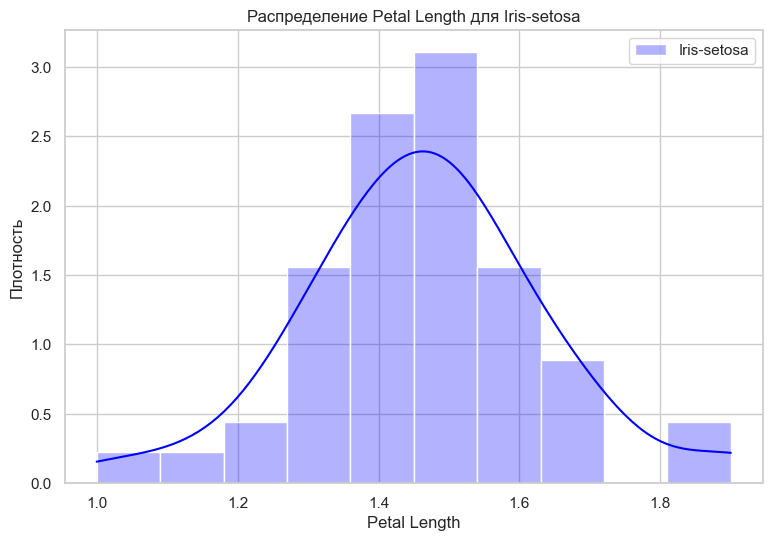

In [568]:
# Фильтрация данных для Iris-setosa
setosa_data = iris_data[iris_data['species'] == 'Iris-setosa']

# Построение графика распределения (KDE) для petal_length Iris-setosa
plt.figure(figsize=(9, 6))
sns.histplot(setosa_data['petal_length'], kde=True, color='blue', fill=True, alpha=0.3, label='Iris-setosa', stat='density')

# Настройка графика
plt.title('Распределение Petal Length для Iris-setosa')
plt.xlabel('Petal Length')
plt.ylabel('Плотность')
plt.legend()
plt.show()


Распределение данных близко к нормальному, значения переменных распределены симметрично вокруг среднего, и форма распределения напоминает колокол.

## Тест Шапиро-Уилка

Этот тест проверяет гипотезу о том, что выборка имеет нормальное распределение.

In [504]:
# Фильтруем данные для Iris setosa:
setosa_petal_length = iris_data[iris_data['species'] == 'Iris-setosa']['petal_length']

In [505]:
# Проводим тест Шапиро-Уилка:
stat, p_value = stats.shapiro(setosa_petal_length)
print(f'Statistic: {stat:.2}, p-value: {p_value:.2}')


Statistic: 0.95, p-value: 0.055


## Интерпретация результатов

In [566]:
if p_value < 0.05:
    print("📈  Распределение длины лепестков (petal length) вида Iris setosa не является нормальным.")
else:
    print("📈  Распределение длины лепестков (petal length) вида Iris setosa можно считать нормальным.")

📈  Распределение длины лепестков (petal length) вида Iris setosa не является нормальным.


# Задание 2: Сравнение средних значений двух групп с использованием T-критерия

📚 Датасет: **Titanic** Dataset https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

🎯 Цель: Проверить, есть ли статистически значимая разница в возрасте пассажиров мужчин и женщин на Титанике.

## Описание датасета

Набор данных **Titanic** охватывает пассажиров судна Titanic и сообщает нам, выжили ли они после его крушения.

Каждая строчка датасета содержит следующие признаки:


- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

## Загрузка и обзор данных

In [507]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats

In [508]:
# Загружаем датасет и смотрим
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S


In [509]:
# Проверяем есть ли пропуски, какие типы данных
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Видно, что есть пропуски значений в колонках Age, Cabin, Embarked. 

In [510]:
# Смотрим статистические характеристики числовых признаков:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [511]:
# Смотрим статистические характеристики категориальных признаков:
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [563]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
Мужчин больше, чем женщин.

Перед применением T-критерия необходимо проверить, нормально ли распределены данные для обеих групп (мужчины и женщины). 
Это можно сделать с помощью:
- Гистограмм
- Q - Q графиков

In [513]:
# Разделяем данные на мужчин и женщин, удаляем пропущенные значения поскольку их немного:
male_ages = titanic_data[titanic_data['Sex'] == 'male']['Age'].dropna()
female_ages = titanic_data[titanic_data['Sex'] == 'female']['Age'].dropna()

In [562]:
#Вычислим средний возраст женщин и мужчин
mean_male_ages = male_ages.mean()
mean_female_ages = female_ages.mean()

# Вывод результатов
print(f"Cредний возраст мужчин, лет: {mean_male_ages:.3}")
print(f"Средний возраст женщин, лет: {mean_female_ages:.3}")

Cредний возраст мужчин, лет: 30.7
Средний возраст женщин, лет: 27.9


Для одновыборочного T-теста желательно, чтобы дисперсия данных была однородной.

In [560]:
# Вычисляем дисперсии
male_variance = male_ages.var(ddof=0)  # Используем ddof=0 для выборочной дисперсии
female_variance = female_ages.var(ddof=0)


# Вывод результатов
print(f"Дисперсия возраста мужчин: {male_variance:.4}")
print(f"Дисперсия возраста женщин: {female_variance:.4}")

Дисперсия возраста мужчин: 215.0
Дисперсия возраста женщин: 198.3


## Построение гистограмм

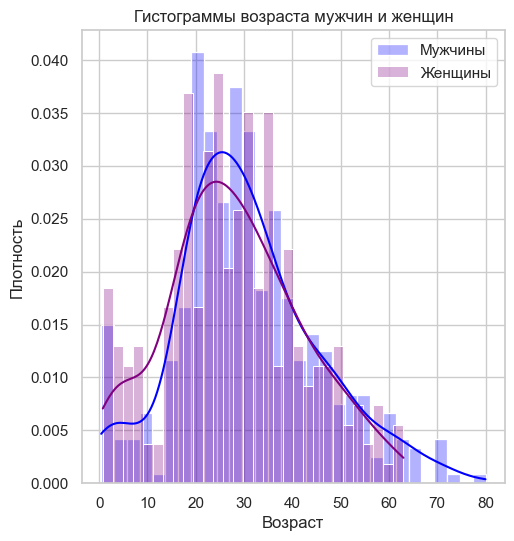

In [516]:
# Настройка графиков
plt.figure(figsize=(12, 6))

# Гистограммы
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
sns.histplot(male_ages, bins=30, kde=True, color='blue', fill=True, alpha=0.3, label='Мужчины', stat='density')
sns.histplot(female_ages, bins=30, kde=True, color='purple', fill=True, alpha=0.3, label='Женщины', stat='density')

plt.title('Гистограммы возраста мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()


Распределение данных близко к нормальному, форма распределения напоминает колокол.

## Построение Q-Q графиков

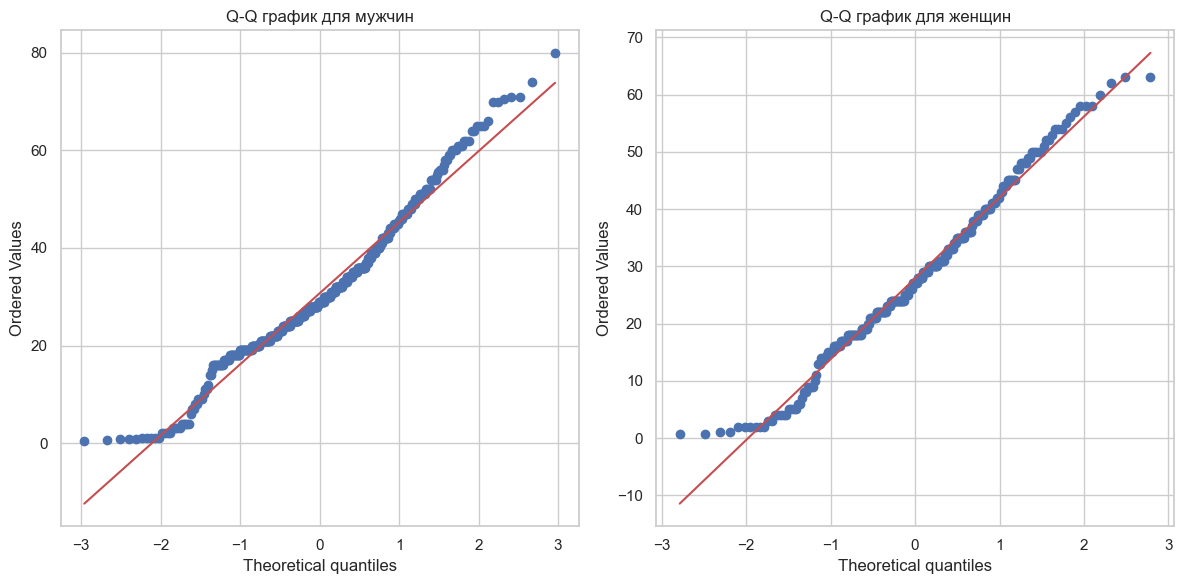

In [517]:
# Создание фигуры с двумя подграфиками в один ряд
plt.figure(figsize=(12, 6))

# Q-Q график для мужчин
plt.subplot(1, 2, 1)  # 1 ряд, 2 колонки, 1-й график
stats.probplot(male_ages, dist="norm", plot=plt)
plt.title('Q-Q график для мужчин')

# Q-Q график для женщин
plt.subplot(1, 2, 2)  # 1 ряд, 2 колонки, 2-й график
stats.probplot(female_ages, dist="norm", plot=plt)
plt.title('Q-Q график для женщин')

# Настройка отступов
plt.tight_layout()
plt.show()

Данные распределились вдоль одной прямой, что свидетельствует о нормальности распределения.

## Т - тест двухвыборочный

Поскольку данные для обеих групп (мужчины и женщины) нормально распределены, то можем провести t-тест для оценки.

In [569]:
# Применение T-критерия
t_stat, p_value = stats.ttest_ind(male_ages, female_ages)

print(f"'T-statistic:', {t_stat:.2}")
print(f"'P-value:', {p_value:.2}")


'T-statistic:', 2.5
'P-value:', 0.013


## Интерпретация результата:


In [519]:
if p_value < 0.05:
    print("📈 Существует статистически значимая разница в возрасте между мужчинами и женщинами.")
else:
    print("📈 Нет статистически значимой разницы в возрасте между мужчинами и женщинами.")

Существует статистически значимая разница в возрасте между мужчинами и женщинами.


# Задание 3: Одновыборочный T-тест для проверки среднего значения

📚 Датасет: **Iris** Dataset https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

🎯 Цель: проверить, отличается ли средняя длина чашелистика (sepal_length) вида Iris virginica от 6.0 см.

## Описание датасета и обзор данных

Описание дата сета и обзор данных см. в [1.1](##1-1-описание-датасета) и [1.2](##1-2-загрузка-и-обзор-данных).

In [520]:
# Фильтруем данные для Iris virginica:
virginica_sepal_length = iris_data[iris_data['species'] == 'Iris-virginica']['sepal_length']
# Вычисим среднее значение
virginica_sepal_length_mean = virginica_sepal_length.mean()

print(f'Среднее значение чашелистика Iris-virginica {virginica_sepal_length_mean:.2f} см.')

Среднее значение чашелистика Iris-virginica 6.59 см.


## T- тест одновыборочный

In [521]:
# Проводим одновыборочный T-тест:
test_value = 6.0
stat, p_value = stats.ttest_1samp(virginica_sepal_length, test_value)
print(f'Statistic: {stat:.2}, p-value: {p_value:.2}')
   

Statistic: 6.5, p-value: 3.4e-08


## Интерпретация результата:


In [546]:
if p_value < 0.05:
    print("📈 Средняя длина чашелистика (sepal_length) вида Iris virginica отличается от 6.0 см.")
else:
    print("📈 Различия нет.")

📈 Средняя длина чашелистика (sepal_length) вида Iris virginica отличается от 6.0 см.


# Задание 4: Сравнение медиан двух независимых выборок с помощью U-критерия Манна-Уитни

📚 Датасет: **Penguins** Dataset
https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

🎯 Цель: проверить, отличается ли медианный размер клюва (bill_length_mm) между видами пингвинов Adelie и Chinstrap.

## Описание датасета

The **Penguin dataset** - это коллекция изображений колоний пингвинов в Антарктиде, полученных в рамках более масштабного проекта penguin watch, который был создан с целью мониторинга изменений в их популяции. Снимки сделаны стационарными камерами в более чем 40 различных местах, которые в течение нескольких лет снимали по одному изображению в час. 

Набор данных состоит из 8 столбцов. 

* **species**: виды пингвинов (Чинстрап, Адели или Генту)
* **island**: название острова (Дрим, Торгерсен или Биско) в архипелаге Палмер (Антарктида)
* **bill_length_mm**: длина хвоста (мм)
* **bill_depth_mm**: глубина гребня (мм)
* **flipper_length_mm**: длина плавника (мм)
* **body_mass_g**: масса тела (г)
* **sex**: пол пингвинов
* **year**: год наблюдения
    

## Загрузка и обзор данных

In [523]:
# Загрузим датасет
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
penguins_data = pd.read_csv(url)
penguins_data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,male,2008
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female,2007
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,female,2009
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,female,2009
297,Chinstrap,Dream,48.5,17.5,191.0,3400.0,male,2007


In [524]:
# Проверяем есть ли пропуски, какие типы данных
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Пропуски есть, их немного.

In [525]:
# Удалим null-значения
penguins_data = penguins_data.dropna()

In [526]:
# Смотрим статистические характеристики категориальных признаков:
penguins_data.describe(include='object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [535]:
# Получение уникальных значений в столбце 'species'
unique_species = penguins_data['species'].unique()
print("Уникальные виды пингвинов:", unique_species)

Уникальные виды пингвинов: ['Adelie' 'Gentoo' 'Chinstrap']


In [529]:
# Смотрим статистические характеристики числовых признаков:
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [536]:
# Фильтруем данные для видов Adelie и Chinstrap:
adelie_bill_length = penguins_data[penguins_data['species'] == 'Adelie']['bill_length_mm']
chinstrap_bill_length = penguins_data[penguins_data['species'] == 'Chinstrap']['bill_length_mm']

In [543]:
# Вычисление медианного размера клюва
adelie_median = adelie_bill_length.median()
chinstrap_median = chinstrap_bill_length.median()

# Вывод результатов
print(f"Медианный размер клюва для Adelie: {adelie_median:.10} mm")
print(f"Медианный размер клюва для Chinstrap: {chinstrap_median:.10} mm")

Медианный размер клюва для Adelie: 38.85 mm
Медианный размер клюва для Chinstrap: 49.55 mm


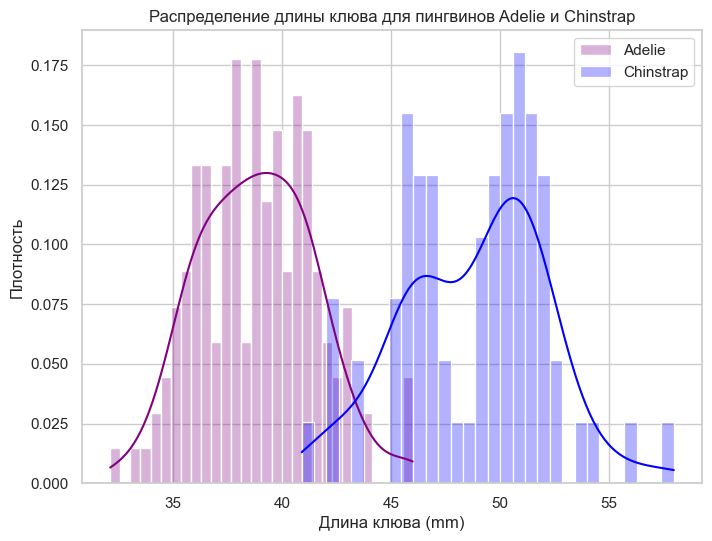

In [532]:
# Построение графиков распределения (KDE) для длины клюва
plt.figure(figsize=(8, 6))

# График для Adelie
sns.histplot(adelie_bill_length, bins=30, kde=True, color='purple', fill=True, alpha=0.3, label='Adelie', stat='density')

# График для Chinstrap
sns.histplot(chinstrap_bill_length, bins=30, kde=True, color='blue', fill=True, alpha=0.3, label='Chinstrap', stat='density')


# Настройка графика
plt.title('Распределение длины клюва для пингвинов Adelie и Chinstrap')
plt.xlabel('Длина клюва (mm)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Данные для Chinstrap имеют 2 пика: данные не соответствуют нормальному распределению.
В данном случае для анализа выборок подойдет критерий Манна-Уитни.

## U-критерий Манна-Уитни 

In [545]:
#  Проводим U-критерий Манна-Уитни:
stat, p_value = stats.mannwhitneyu(adelie_bill_length, chinstrap_bill_length)
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 100.0, p-value: 9.062978492291712e-31


- Statistic- это значение U-статистики, которое указывает на количество пар, в которых элементы из первой выборки меньше, чем элементы из второй выборки.
- p-value близко к нулю,  оно указывает на то, что с большой уверенностью можно утверждать, что длины клюва пингвинов двух видов статистически различаются.

## Интерпретация результата

In [534]:
if p_value < 0.05:
    print("📈 Медианный размер клюва (bill_length_mm) между видами Adelie и Chinstrap имеет отличия.")
else:
    print("📈 Медианный размер клюва (bill_length_mm) между видами Adelie и Chinstrap не имеет отличия.")

📈 Медианный размер клюва (bill_length_mm) между видами Adelie и Chinstrap имеет отличия.
